In [279]:
import matplotlib
matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
import matplotlib.pyplot as plt
import numpy as np


In [264]:

# Do some global setup so all of our graphs have the same look

def basis_activation(i, knots, k, x):
    """ calculate the value of the i-th B-spline basis function of degree k at x """
    if k == 0:
        return float(knots[i] <= x < knots[i + 1])
    else:
        denom1 = knots[i + k] - knots[i]
        denom2 = knots[i + k + 1] - knots[i + 1]
        term1 = (basis_activation(i, knots, k - 1, x) * (x - knots[i]) / denom1) if denom1 > 0 else 0
        term2 = (basis_activation(i + 1, knots, k - 1, x) * (knots[i + k + 1] - x) / denom2) if denom2 > 0 else 0
        return term1 + term2

def setup_graph():
    plt.xlim(-1, 8)
    plt.ylim(-1, 2)
    plt.xticks(range(8))
    plt.yticks([0, 1])
    plt.axhline(0, color='black', ls='--')
    plt.axvline(0, color='black', ls='--')

def setup_just_text():
    fig = plt.gca()
    fig.axes.get_xaxis().set_visible(False)                                         
    fig.axes.get_yaxis().set_visible(False)   
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.spines['bottom'].set_visible(False)
    fig.spines['left'].set_visible(False)

knots = list(range(9))
x = [x/10 for x in range(-10,100)]

image_folder_name = "generated_images"

basis_colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray"]

import os
os.makedirs(image_folder_name, exist_ok=True)

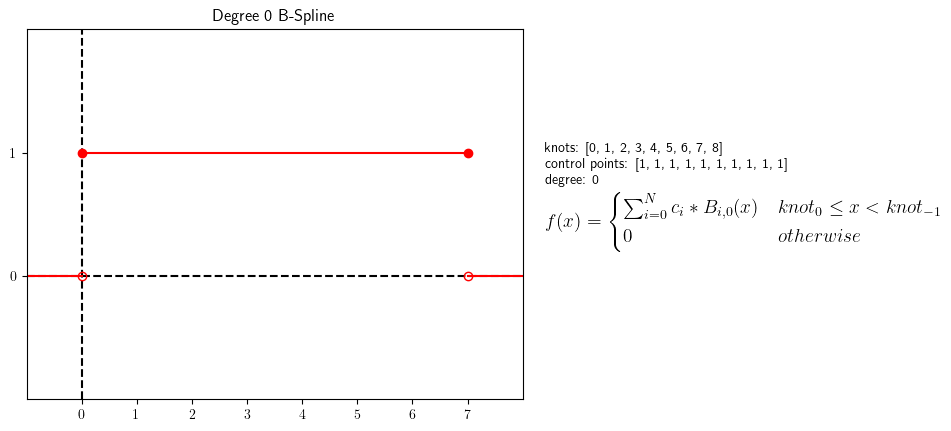

In [265]:
text_left = 8.4
text_bottom = 0.4

function_tex_string=r"$f(x) = \begin{cases} \sum_{i=0}^{N} c_i * B_{i,0}(x) &  knot_0 \leq x < knot_{-1}\\ 0 & otherwise \end{cases}$"

setup_graph()
plt.plot([0, 7], [1, 1], "ro-")
plt.plot([-2,0], [0,0], "ro-", fillstyle='none')
plt.plot([7,10], [0,0], "ro-", fillstyle='none')
plt.title("Degree 0 B-Spline")
# put text to the right of the plot
plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ncontrol points:    {[1]*10}\ndegree: 0",)
plt.text(text_left, text_bottom, function_tex_string, fontsize=14)
# show
with open(f"{image_folder_name}/bspline_degree_0.png", "wb") as file:
    plt.savefig(file, bbox_inches='tight')
plt.show()

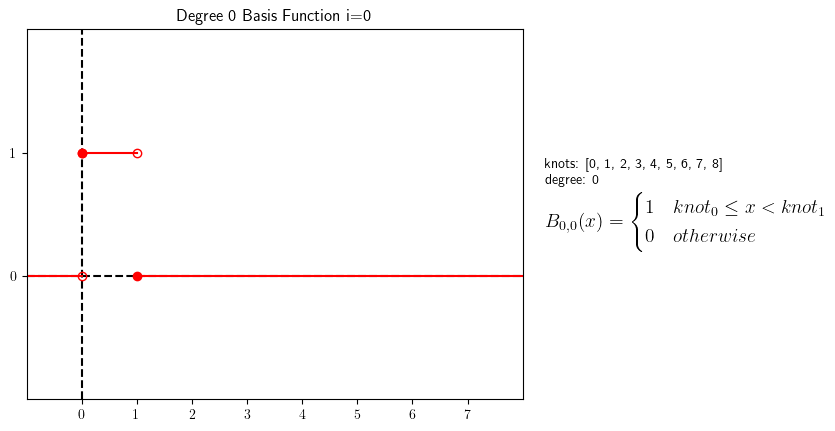

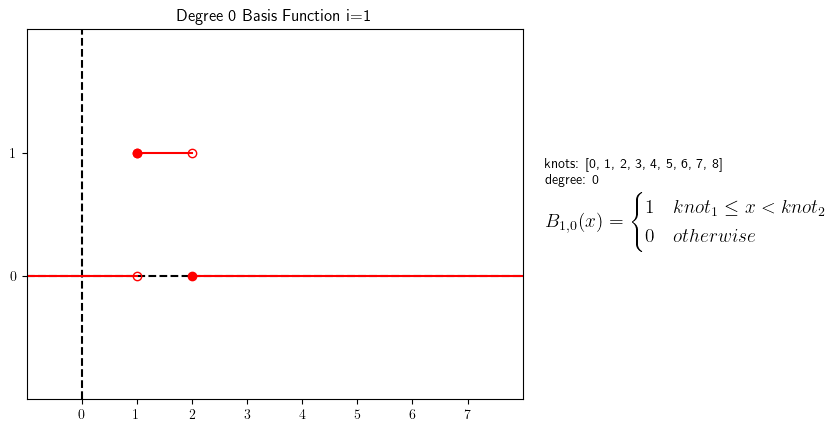

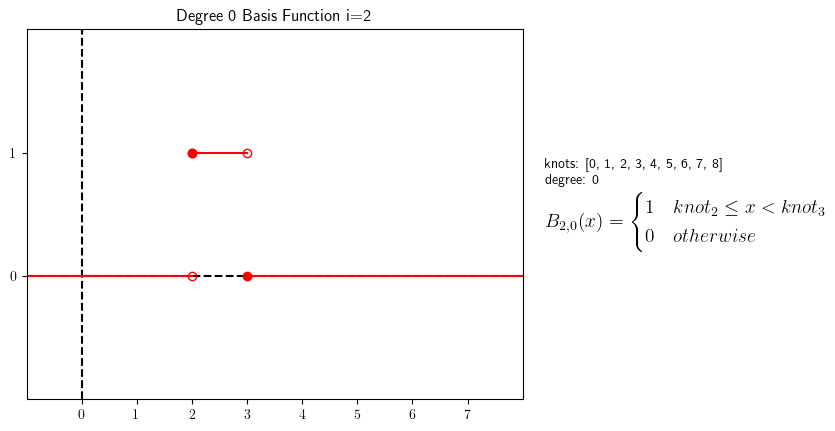

In [266]:
degree_0_folder_name = f"{image_folder_name}/degree_0"
os.makedirs(degree_0_folder_name, exist_ok=True)

text_left = 8.4
text_bottom = 0.4
for i in range (3):
    function_tex_string=r"$B_{" + str(i) + r",0}(x) = \begin{cases} 1 &  knot_{" + str(i) + r"} \leq x < knot_{" + str(i + 1) + r"}\\ 0 & otherwise \end{cases}$"
    plt.title(f"Degree 0 Basis Function i={i}") 
    setup_graph()
    plt.plot([-2,i], [0,0], "ro-", fillstyle='none')
    plt.plot(i, 1, "ro-")
    plt.plot([i, i+1], [1,1], "ro-", fillstyle='none')
    plt.plot([i+1,12], [0,0], "ro-")
    plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ndegree: 0",)
    plt.text(text_left, text_bottom, function_tex_string, fontsize=14)
    with open(f"{degree_0_folder_name}/degree_0_basis_{i}.png", "wb") as file:
        plt.savefig(file, bbox_inches='tight')
    plt.show()


$$
B_{i,k}(x) = 
\frac{x-knot_i}{knot_{i+k}-knot_{i}}B_{i, k-1}(x) + \frac{knot_{i+k}-x}{knot_{i+k+1}-knot_{i+1}}B_{i+1,k-1}(x)
$$

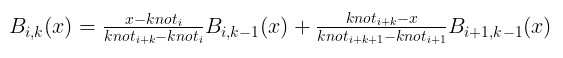

In [267]:
latex_expression = r"$B_{i,k}(x) = \frac{x-knot_i}{knot_{i+k}-knot_{i}}B_{i, k-1}(x) + \frac{knot_{i+k}-x}{knot_{i+k+1}-knot_{i+1}}B_{i+1,k-1}(x)$"
fig = plt.figure(figsize=(3, 0.5))  # Dimensions of figsize are in inches
text = fig.text(
    x=0.5,  # x-coordinate to place the text
    y=0.5,  # y-coordinate to place the text
    s=latex_expression,
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=16,
)
fig.savefig(f"{image_folder_name}/basis_formula.png", bbox_inches="tight")

setup_just_text() # unsure why this makes the difference between the text showing or not, but it does

plt.show()


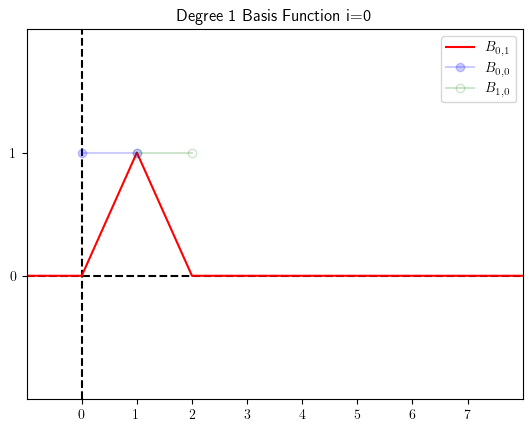

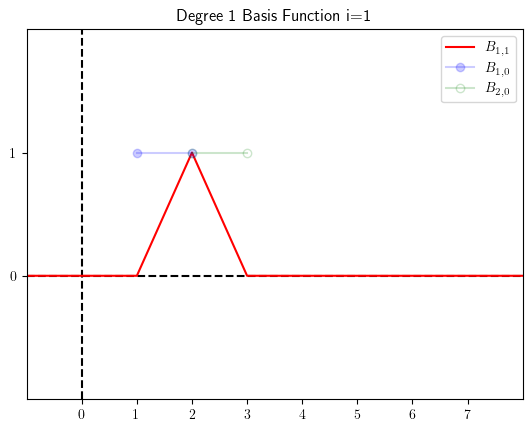

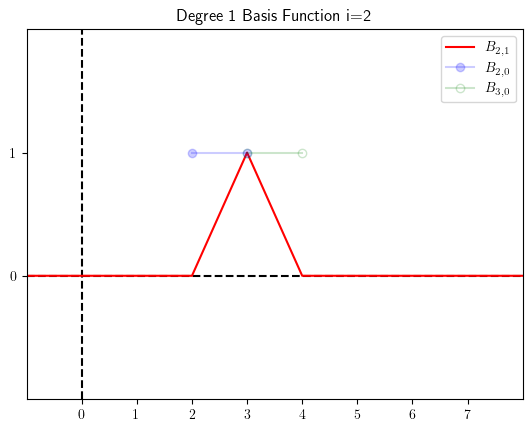

In [268]:
# Plot the first three basis functions for a degree 1 B-spline
degree_1_folder_name = f"{image_folder_name}/degree_1"
os.makedirs(degree_1_folder_name, exist_ok=True)

for i in range(3):
    y = [basis_activation(i, knots, 1, x_i) for x_i in x]
    plt.title(f"Degree 1 Basis Function i={i}")
    setup_graph()
    plt.plot(x, y, label=f"$B_{{{i},1}}$", color="red")
    plt.plot([i, i+1], [1,1], "bo-", label=f"$B_{{{i},0}}$", alpha=0.2)
    plt.plot([i+1, i+2], [1,1], "go-", label=f"$B_{{{i+1},0}}$", alpha=0.2, fillstyle='none') 
    plt.legend()
    plt.savefig(f"{degree_1_folder_name}/degree_1_basis_{i}.png", bbox_inches='tight')
    plt.show()

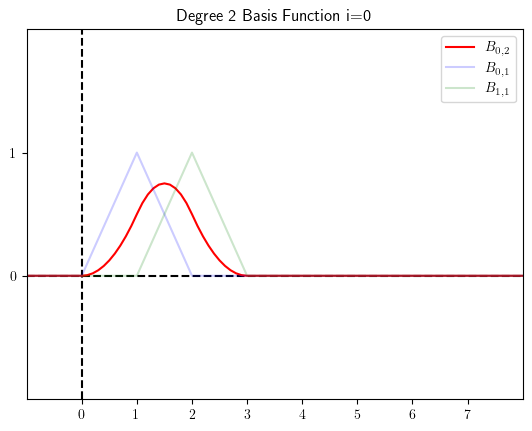

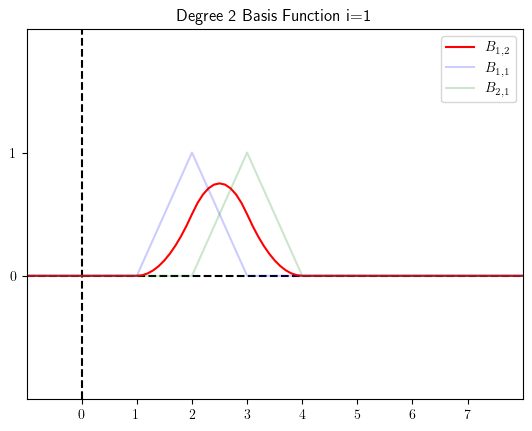

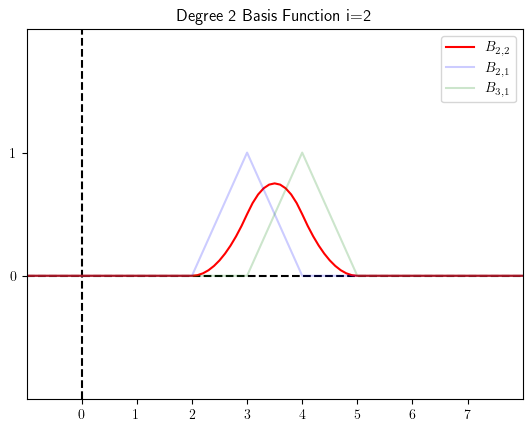

In [269]:
degree_2_folder_name = f"{image_folder_name}/degree_2"
os.makedirs(degree_2_folder_name, exist_ok=True)

# Plot the first three basis functions for a degree 2 B-spline
for i in range(3):
    y = [basis_activation(i, knots, 2, x_i) for x_i in x]
    dep_1 = [basis_activation(i, knots, 1, x_i) for x_i in x]
    dep_2 = [basis_activation(i+1, knots, 1, x_i) for x_i in x]
    plt.title(f"Degree 2 Basis Function i={i}")
    setup_graph()
    plt.plot(x, y, label=f"$B_{{{i},2}}$", color="red")
    plt.plot(x, dep_1, label=f"$B_{{{i},1}}$", color="blue", alpha=0.2)
    plt.plot(x, dep_2, label=f"$B_{{{i+1},1}}$", color="green", alpha=0.2)
    plt.legend()
    plt.savefig(f"{degree_2_folder_name}/degree_2_basis_{i}.png", bbox_inches='tight')
    plt.show()

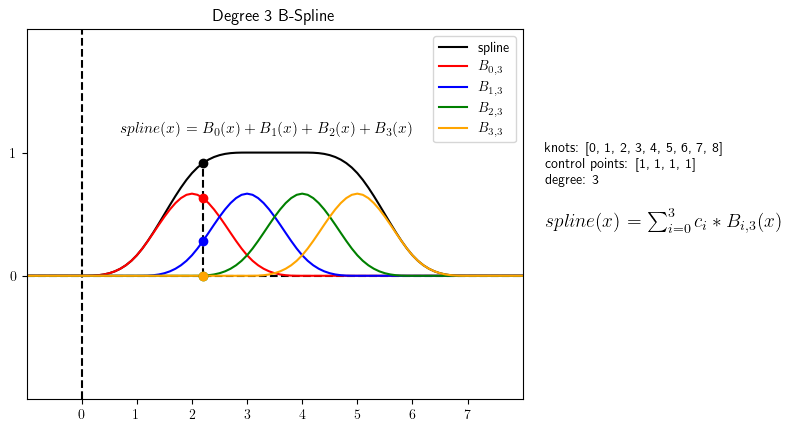

In [270]:
# Degree 3 B-spline, showing all basis activations, with control points set to 1
function_tex_string=r"$spline(x) = \sum_{i=0}^{3} c_i * B_{i,3}(x)$"

setup_graph()

basis_functions = [[basis_activation(i, knots, 3, x_i) for x_i in x] for i in range(4)]

full_spline = [sum([basis_functions[i][j] for i in range(4)]) for j in range(len(x))]
plt.plot(x, full_spline, label="spline", color="black")
for i in range(4):
    plt.plot(x, basis_functions[i], label=f"$B_{{{i},3}}$", color=basis_colors[i])

plt.legend()
plt.title("Degree 3 B-Spline")
plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ncontrol points: {[1]*4}\ndegree: 3",)
plt.text(text_left, text_bottom, function_tex_string, fontsize=14)

# plot the color-coded points for each function at x=2
example_x = 2.2
basis_functions_at_example_x = [basis_activation(i, knots, 3, example_x) for i in range(4)]
plt.vlines(example_x, 0, sum(basis_functions_at_example_x), color="black", ls="--")

for i in range(4):
    plt.plot(example_x, basis_functions_at_example_x[i], marker='o', color=basis_colors[i])

plt.plot(example_x, sum(basis_functions_at_example_x), "ko")
plt.annotate(r"$spline(x) = B_0(x) + B_1(x) + B_2(x) + B_3(x)$", xy=(example_x, sum(basis_functions_at_example_x)), xytext=(example_x - 1.5, sum(basis_functions_at_example_x) + 0.25), fontsize=11)


plt.savefig(f"{image_folder_name}/bspline_degree_3_full.png", bbox_inches='tight')

plt.show()

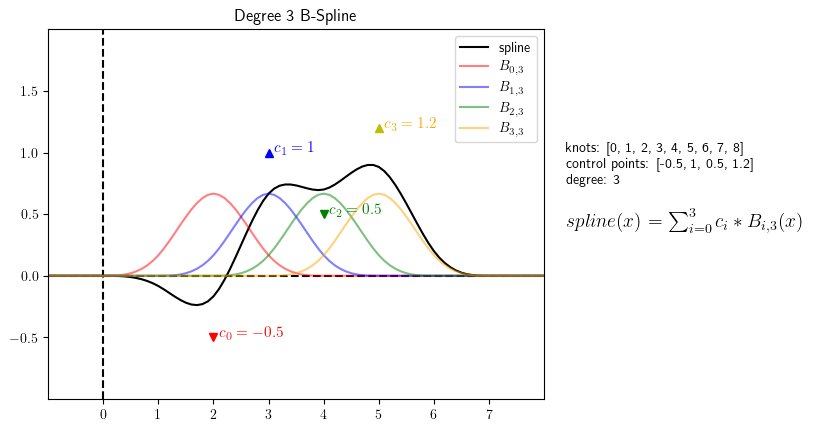

In [286]:
# Degree 3 B-spline, showing all basis activations, showing control points

control_points = [-0.5, 1, .5, 1.2]

setup_graph()
plt.yticks([-0.5, 0, 0.5, 1, 1.5])
basis_functions = [[basis_activation(i, knots, 3, x_i) for x_i in x] for i in range(4)]
full_spline = [sum([basis_functions[i][j] * control_points[i] for i in range(4)]) for j in range(len(x))]

plt.plot(x, full_spline, label="spline", color="black")
for i in range(4):
    plt.plot(x, basis_functions[i], label=f"$B_{{{i},3}}$", color=basis_colors[i], alpha=0.5)

plt.legend()
plt.title("Degree 3 B-Spline")
plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ncontrol points:    {control_points}\ndegree: 3",)
plt.text(text_left, text_bottom, function_tex_string, fontsize=14)

# plot the color-coded control points
plt.plot(knots[2], control_points[0], "rv")
plt.plot(knots[3], control_points[1], "b^")
plt.plot(knots[4], control_points[2], "gv")
plt.plot(knots[5], control_points[3], "y^")

for i in range(4):
    plt.annotate(f"$c_{i} = {control_points[i]}$", xy=(knots[i + 2], control_points[i]), xytext=(knots[i + 2] + 0.1, control_points[i]), fontsize=11, color=basis_colors[i])

plt.savefig(f"{image_folder_name}/bspline_degree_3_full_with_control_points.png", bbox_inches='tight')
plt.show()

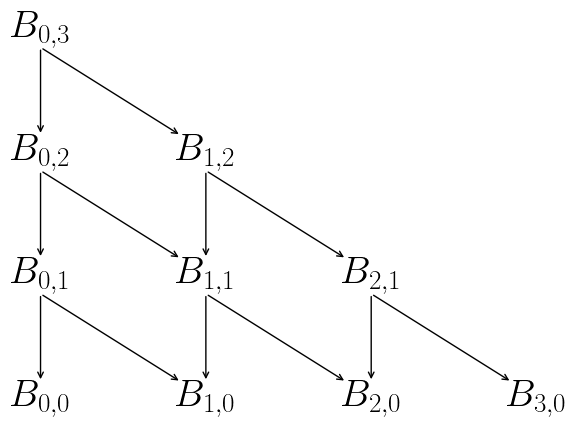

In [272]:
pyramid_folder_name = f"{image_folder_name}/basis_pyramid"
os.makedirs(pyramid_folder_name, exist_ok=True)
# Draw the basis pyramid for a single basis function
plt.axis('off')

degree = 3

vertical_spacing = 1/3
horizontal_spacing = 1/3
fontsize = 28

for layer in range(degree + 1):
    y_coord = layer * vertical_spacing
    for i in range(degree - layer + 1):
        x_coord = i * horizontal_spacing
        plt.text(x_coord, y_coord, f"$B_{{{i},{layer}}}$", ha="center", va="bottom", fontsize=fontsize)
        if layer > 0:
            # plt.plot([x_coord] * 2, [y_coord, y_coord - vertical_spacing + (vertical_spacing * fontsize/80)], color="black", ls="--")
            plt.annotate("", xy=(x_coord, y_coord - (vertical_spacing - fontsize/800)*0.8 ), xytext=(x_coord, y_coord), arrowprops=dict(arrowstyle="->", lw=1))
            plt.annotate("", xy=(x_coord + (horizontal_spacing - fontsize/800) * 0.95, y_coord - (vertical_spacing - fontsize/800)*0.8 ), xytext=(x_coord, y_coord), arrowprops=dict(arrowstyle="->", lw=1))

plt.savefig(f"{pyramid_folder_name}/single_basis_pyramid.png", bbox_inches='tight')
plt.show()

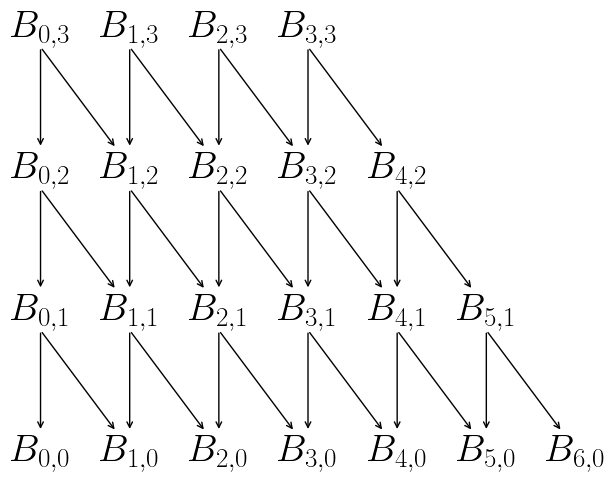

In [273]:
# Draw the basis pyramid for multiple top-level basis functions
fig, ax = plt.subplots()
fig.tight_layout()
ax.axis('off')
degree = 3
top_level_functions = 4



vertical_spacing = 1/3
horizontal_spacing = 1/3
fontsize = 28

for layer in range(degree + 1):
    y_coord = layer * vertical_spacing
    for i in range(degree - layer + top_level_functions):
        x_coord = i * horizontal_spacing
        ax.text(x_coord, y_coord, f"$B_{{{i},{layer}}}$", ha="center", va="bottom", fontsize=fontsize)
        if layer > 0:
            arrow_1_x = x_coord
            arrow_2_x = x_coord + (horizontal_spacing - fontsize/800) * 0.95
            arrow_1_y = y_coord - (vertical_spacing - fontsize/800)*0.8
            arrow_2_y = y_coord - (vertical_spacing - fontsize/800)*0.8
            ax.annotate("", xy=(arrow_1_x, arrow_1_y), xytext=(x_coord, y_coord), arrowprops=dict(arrowstyle="->", lw=1))
            ax.annotate("", xy=(arrow_2_x , arrow_2_y), xytext=(x_coord, y_coord), arrowprops=dict(arrowstyle="->", lw=1))

            # half the arrows weren't getting drawn, and for some reason this fixed it. Don't ask me why - matplotlib is weird
            plt.plot([x_coord] * 2, [y_coord, y_coord - vertical_spacing + (vertical_spacing * fontsize/80)], alpha=0.0)
            plt.plot([x_coord, arrow_2_x], [y_coord, arrow_2_y],alpha=0.0)
        
fig.savefig(f"{pyramid_folder_name}/multiple_basis_pyramid.png", bbox_inches='tight')
plt.show()

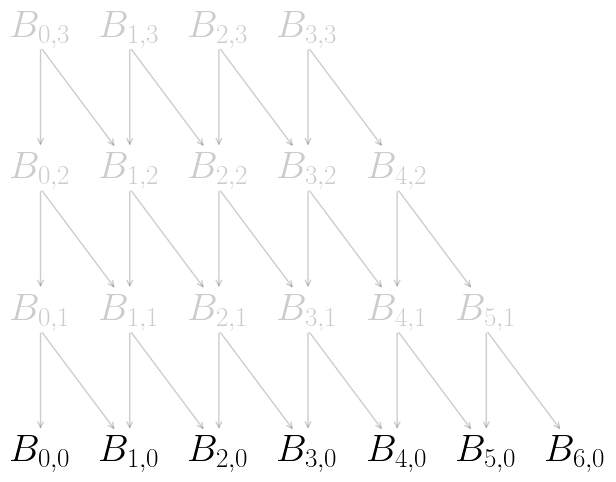

In [274]:
# Draw the basis pyramid for multiple top-level basis functions, with all but the bottom layer grayed out
fig, ax = plt.subplots()
fig.tight_layout()
ax.axis('off')
degree = 3
top_level_functions = 4



vertical_spacing = 1/3
horizontal_spacing = 1/3
fontsize = 28

for layer in range(degree + 1):
    y_coord = layer * vertical_spacing
    for i in range(degree - layer + top_level_functions):
        x_coord = i * horizontal_spacing
        ax.text(x_coord, y_coord, f"$B_{{{i},{layer}}}$", ha="center", va="bottom", fontsize=fontsize, alpha = 1 if layer == 0 else 0.2)
        if layer > 0:
            arrow_1_x = x_coord
            arrow_2_x = x_coord + (horizontal_spacing - fontsize/800) * 0.95
            arrow_1_y = y_coord - (vertical_spacing - fontsize/800)*0.8
            arrow_2_y = y_coord - (vertical_spacing - fontsize/800)*0.8
            ax.annotate("", xy=(arrow_1_x, arrow_1_y), xytext=(x_coord, y_coord), arrowprops=dict(arrowstyle="->", lw=1, alpha = 0.2))
            ax.annotate("", xy=(arrow_2_x , arrow_2_y), xytext=(x_coord, y_coord), arrowprops=dict(arrowstyle="->", lw=1, alpha = 0.2))

            # half the arrows weren't getting drawn, and for some reason this fixed it. Don't ask me why - matplotlib is weird
            plt.plot([x_coord] * 2, [y_coord, y_coord - vertical_spacing + (vertical_spacing * fontsize/80)], alpha=0.0)
            plt.plot([x_coord, arrow_2_x], [y_coord, arrow_2_y],alpha=0.0)
        
fig.savefig(f"{pyramid_folder_name}/multiple_basis_pyramid_bot_layer_filled.png", bbox_inches='tight')
plt.show()

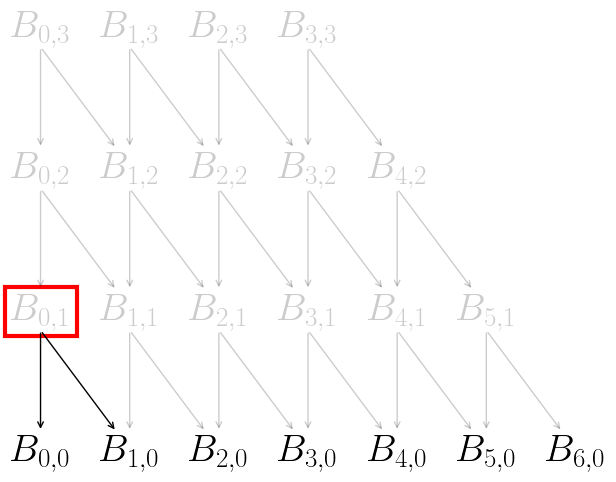

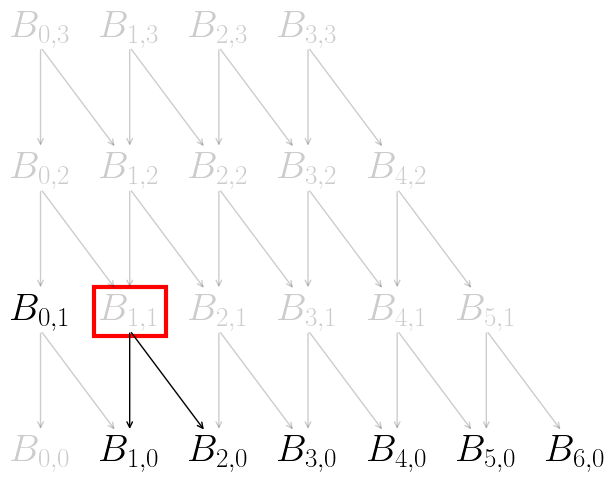

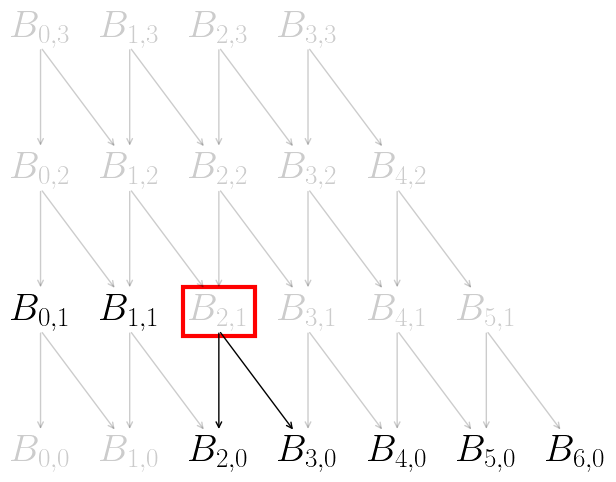

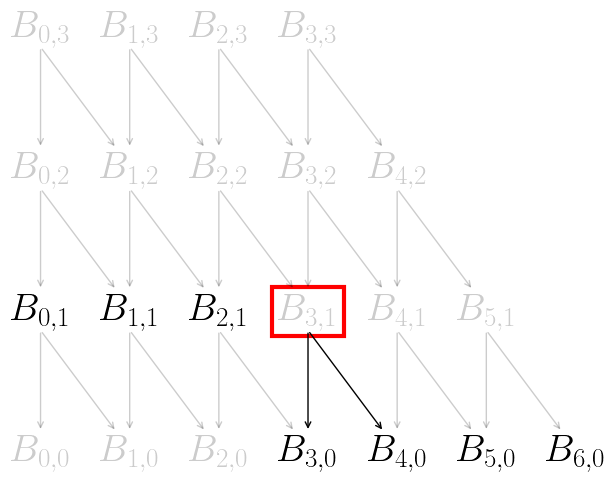

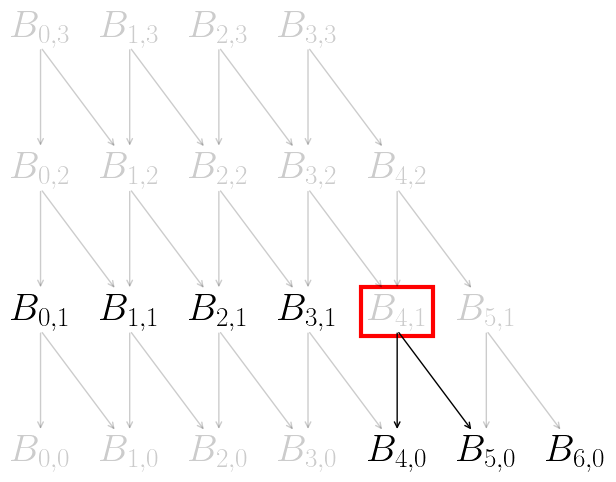

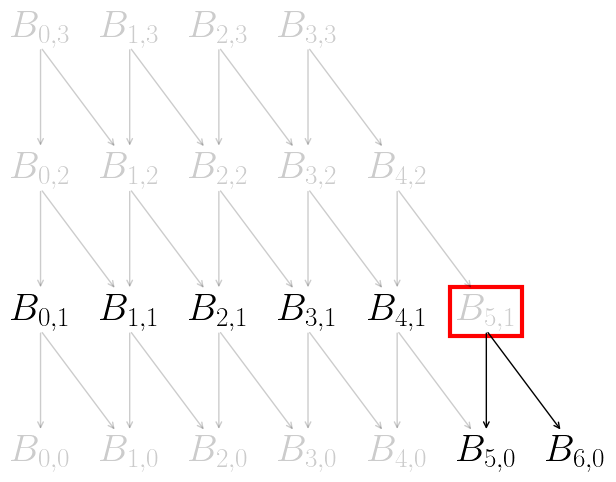

In [276]:


# Draw the basis pyramid for multiple top-level basis functions, bottom layer filled in, calculating B_0_0
degree = 3
top_level_functions = 4

vertical_spacing = 1/3
horizontal_spacing = 1/3
fontsize = 28

for target_basis_function in range(6):
    fig, ax = plt.subplots()
    fig.tight_layout()
    ax.axis('off')
    for layer in range(degree + 1):
        y_coord = layer * vertical_spacing
        for i in range(degree - layer + top_level_functions):
            is_target_function = i == target_basis_function and layer == 1
            text_alpha = 1 if ((layer == 0 and i >= target_basis_function) or (layer == 1 and i < target_basis_function)) else 0.2
            bounding_box = dict(edgecolor="red", facecolor="none", lw=3) if is_target_function else None
            x_coord = i * horizontal_spacing
            ax.text(x_coord, y_coord, f"$B_{{{i},{layer}}}$", ha="center", va="bottom", fontsize=fontsize, alpha = text_alpha, bbox=bounding_box)
            if layer > 0:
                arrow_1_x = x_coord
                arrow_2_x = x_coord + (horizontal_spacing - fontsize/800) * 0.95
                arrow_1_y = y_coord - (vertical_spacing - fontsize/800)*0.8
                arrow_2_y = y_coord - (vertical_spacing - fontsize/800)*0.8
                arrow_alpha = 1 if is_target_function else 0.2
                ax.annotate("", xy=(arrow_1_x, arrow_1_y), xytext=(x_coord, y_coord), arrowprops=dict(arrowstyle="->", lw=1, alpha = arrow_alpha))
                ax.annotate("", xy=(arrow_2_x , arrow_2_y), xytext=(x_coord, y_coord), arrowprops=dict(arrowstyle="->", lw=1, alpha = arrow_alpha))

                # half the arrows weren't getting drawn, and for some reason this fixed it. Don't ask me why - matplotlib is weird
                plt.plot([x_coord] * 2, [y_coord, y_coord - vertical_spacing + (vertical_spacing * fontsize/80)], alpha=0.0)
                plt.plot([x_coord, arrow_2_x], [y_coord, arrow_2_y],alpha=0.0)
    fig.savefig(f"{pyramid_folder_name}/calculating_B_{target_basis_function}_{layer}.png", bbox_inches='tight')
    plt.show()